# Adaptive-Runge–Kutta

Compile, run, and plot the result from RKF.cpp

In [1]:
import os
os.chdir("../")

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [3]:
%%sh
g++ RKF.cpp -I ./ -std=c++17

./a.out;

I'm done


In [4]:
#load results

t= np.loadtxt('./test/t.dat')
y1=np.loadtxt('./test/y1.dat')
y2=np.loadtxt('./test/y2.dat')
y3=np.loadtxt('./test/y3.dat')

err=np.loadtxt('./test/err.dat')

<IPython.core.display.Javascript object>


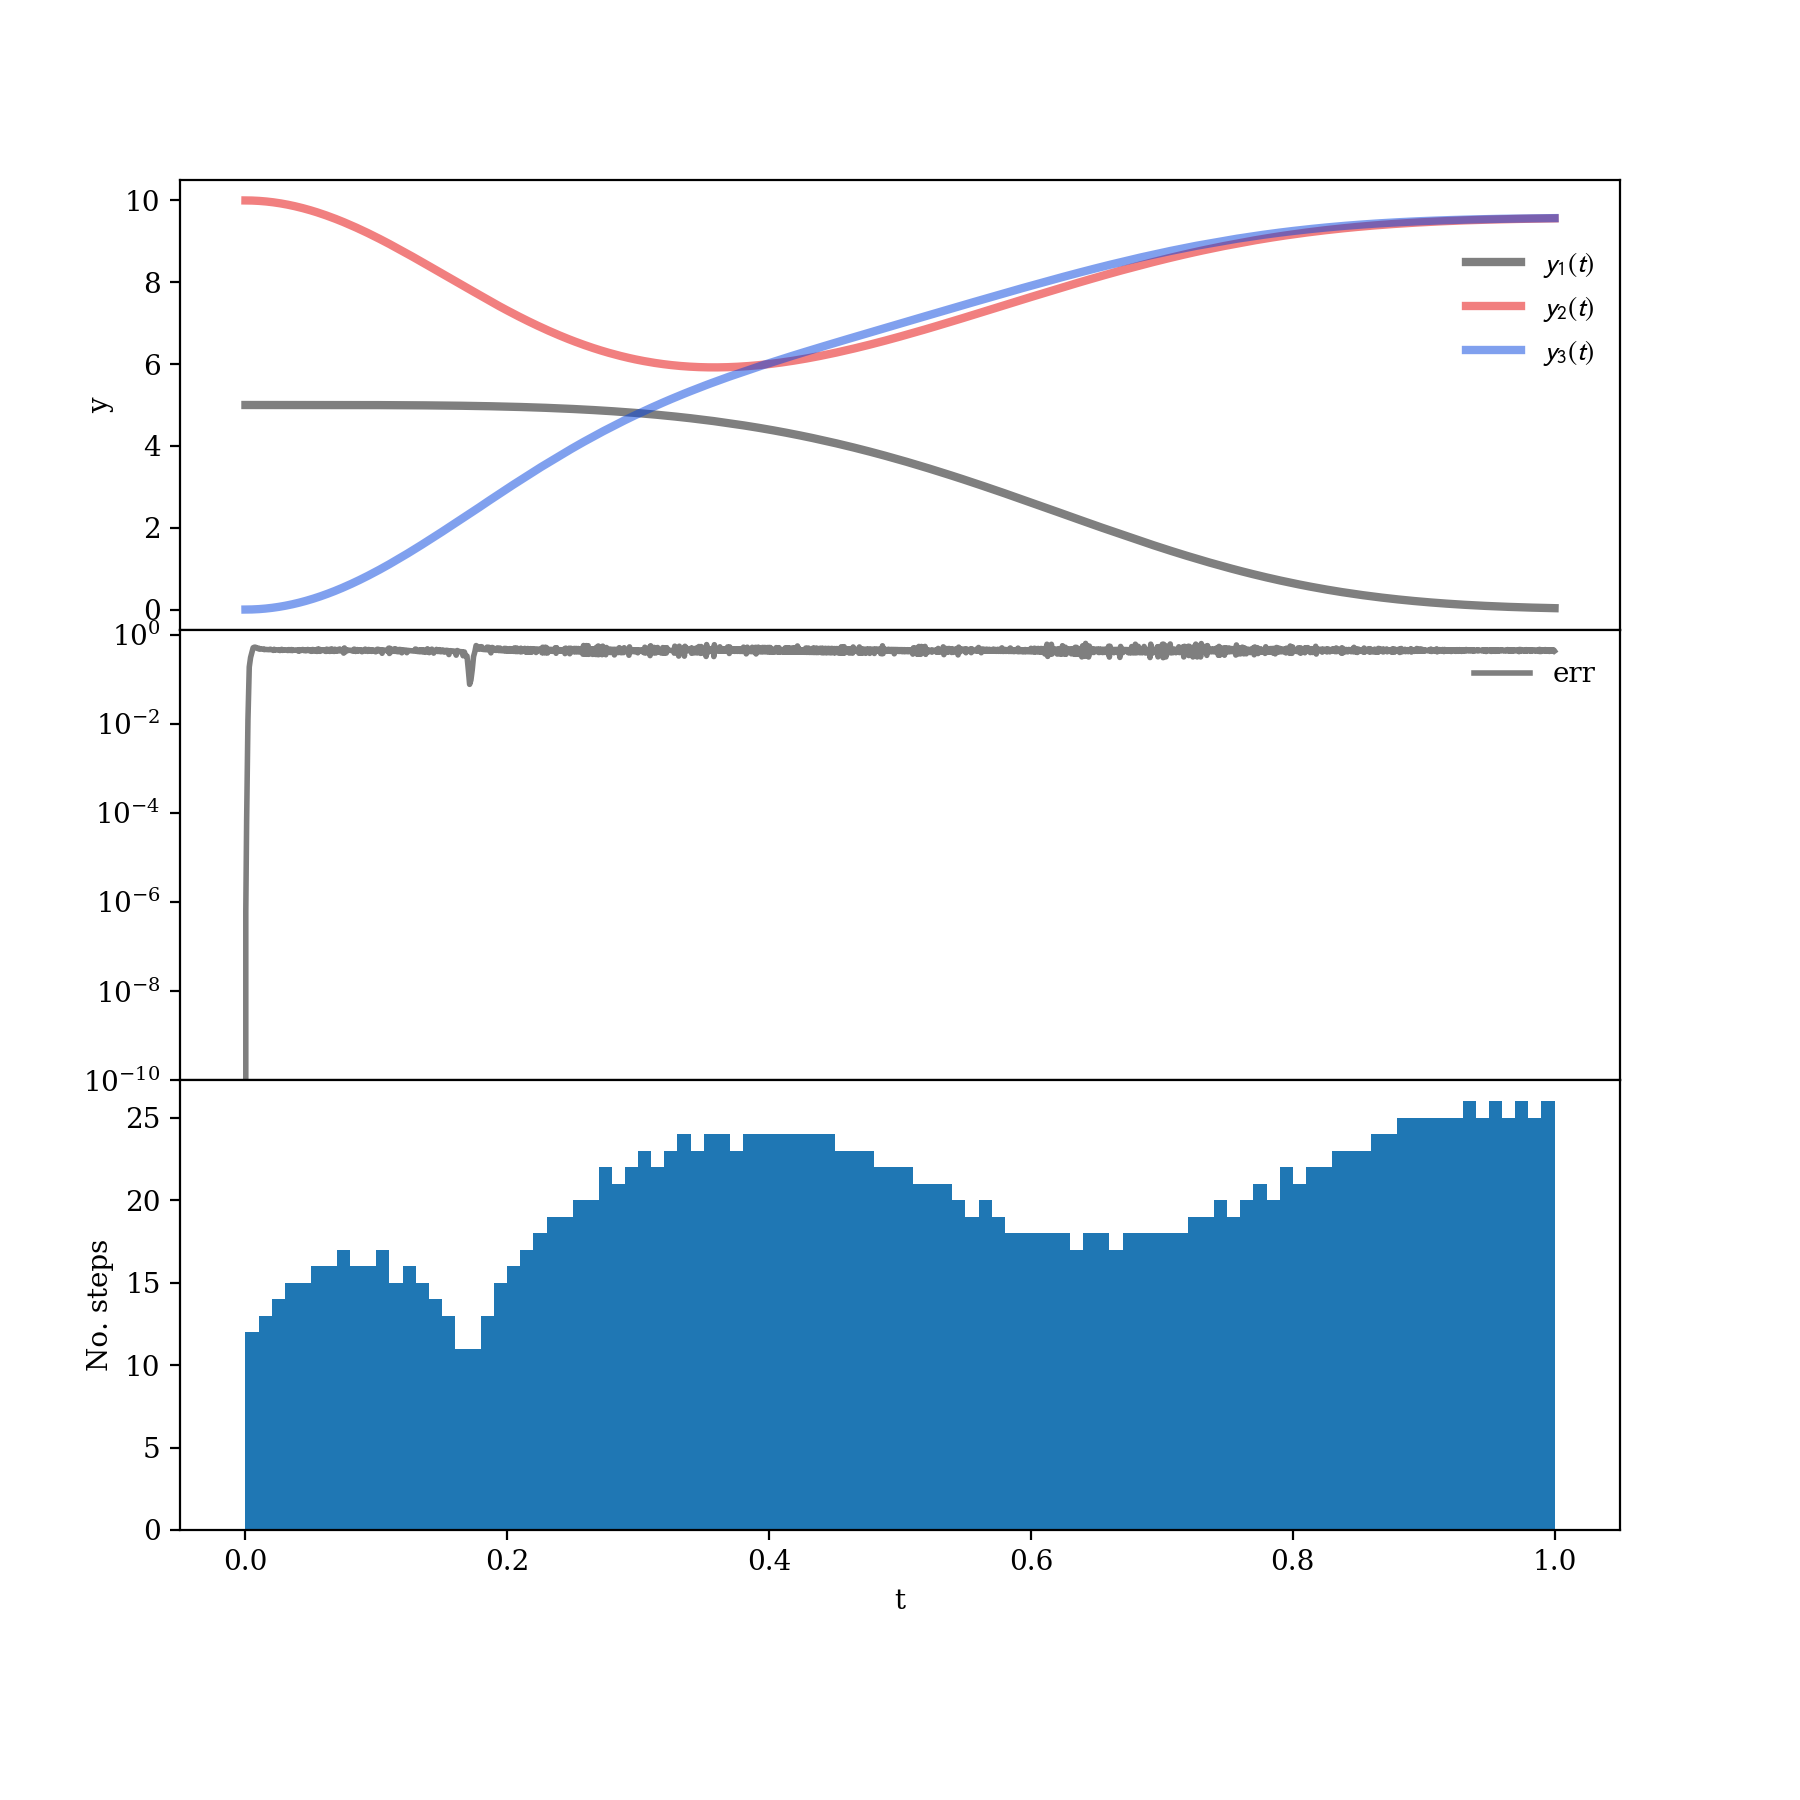

In [5]:
fig=plt.figure(figsize=(9,9))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(311)

sub.plot(t,y1,c=_c[0],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{1}(t)$')
sub.plot(t,y2,c=_c[1],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{2}(t)$')
sub.plot(t,y3,c=_c[2],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{3}(t)$')
sub.legend(framealpha=0,ncol=1,loc='upper right',bbox_to_anchor=(1,.9))

sub.set_ylabel('y')   
    

sub = fig.add_subplot(312)    
sub.plot(t,err,c=_c[0],alpha=0.5,linestyle='-',linewidth=2,label="err")
sub.legend(framealpha=0,ncol=1,loc='center right',bbox_to_anchor=(1,.9))

        
if max(err) != 0 : 
    sub.set_ylim(max([min(err),1e-10]),max(err)*2 )
    sub.set_yscale('log')
else:
    sub.set_ylim(min(err),max(err))



sub = fig.add_subplot(313)    
sub.hist(t,bins=100)
sub.set_ylabel('No. steps')
    
   
sub.set_xlabel('t')  
plt.show()